# アヤメのデータ分析

「フィッシャーのアヤメ」という機械学習やデータ分析の世界で有名なデータセットを使い、基本的なデータの扱い方を学んでいきます。


これはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータです。

・Iris setosa - Wikipedia

・Iris virgicolor - Wikipedia

・Iris virginica - Wikipedia

setosa、virgiclor、virginicaはここで 目的変数 や ラベル と呼ばれるものに当たります。


1本ごとにsepal_length（がく片の長さ）, sepal_width（がく片の幅）, petal_length（花弁の長さ）, petal_width（花弁の幅）の4種類の情報が記録されています。この4種類を 特徴量 と呼びます。

## データセットの準備
scikit-learnという機械学習ライブラリにはirisデータセットが用意されているため、これを使用します。

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 【問題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。


sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation


データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。


pandas.DataFrame — pandas 0.24.2 documentation

In [2]:
iris_dataset = load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
#データフレームに変換　カラム名も指定
X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
display(X)

#データフレームの行（rows　axis＝0のこと）を隠さず表示
#pd.set_option('display.max_rows', None)

#データフレームの列（columns　axis＝1のこと）を隠さず全て表示
#pd.set_option("display.max_columns", None)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# データに変換、目的変数（ターゲット）が対象。
y = pd.DataFrame(iris_dataset.target, columns=["Species"])
display(y)

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## 【問題2】データの結合
問題1で準備したX,yを結合させたDataFrame型変数dfを作成してください。結合することで扱いやすくなります。これ以降はこのdfを使っていきます。

In [5]:
#軸のデフォルトは０、列で結合するのでaxis = 1を指定
df = pd.concat([X,y],axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 【問題3】データの確認
今回扱うデータがどのようなものなのかを確認します。以下の4つを行ってください。


先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）
ラベルごとのサンプル数の合計を出力する。
特徴量に欠損値があるかを確認する。
特徴量の平均値と標準偏差、四分位数を一度に表示させる。

DataFrameのメソッドである.head(),.info(),.describe(),.isnull(),.sum()や、Seriesのメソッドである.value_countsなどを使ってみましょう。


pandas.DataFrame.head — pandas 0.25.3 documentation


pandas.DataFrame.info — pandas 0.25.3 documentation


pandas.DataFrame.describe — pandas 0.25.3 documentation


pandas.DataFrame.isnull — pandas 0.25.3 documentation


pandas.DataFrame.sum — pandas 0.25.3 documentation


pandas.Series.value_counts — pandas 0.25.3 documentation

### 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）

In [6]:
#先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。
df.head(5)


,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### ラベルごとのサンプル数の合計を出力する。

In [33]:
#ラベルごとのサンプル数の合計を出力する
label_0 = df['Species'] == 0
print("ラベル0は{}個".format(label_0.sum()))
label_1 = df['Species'] == 1
print("ラベル1は{}個".format(label_1.sum()))
label_2 = df['Species'] == 2
print("ラベル2は{}個".format(label_2.sum()))

display(df["Species"].value_counts())


ラベル0は50個
ラベル1は50個
ラベル2は50個


0    50
1    50
2    50
Name: Species, dtype: int64

### 特徴量に欠損値があるかを確認する。

In [10]:
#特徴量に欠損値があるかを確認する。
df.isnull().sum(axis=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

### 別回答

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [11]:
#特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 【問題4】irisデータセット自体の調査

ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

各特徴量や特徴量同士の関係を見ていきます。




## 【問題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。以下を行ってください。


sepal_widthの列を３つの異なる方法で抽出する
50番目から99番目までのデータを抽出する
petal_lengthの列の50番目から99番目までのデータを抽出する
petal_widthの値が0.2のデータを抽出する

.locや.ilocを使うことになります。この２つはどう違うのかについて説明してください。

### sepal_widthの列を３つの異なる方法で抽出する

In [18]:
# sepal_widthの列を３つの異なる方法で抽出する

#表示が長くなるため５行のみ表示

display(df["sepal_width"].head())#列名指定

display(df.sepal_width.head())#列名をメソッドのように指定

display(df.loc[:, "sepal_width"].head())#二次元配列をイメージして列名指定

display(df.iloc[:,1].head())#二次元配列のようにイメージして列番号指定

print("locは行名と列名で位置を指定、ilocは行番号と列番号で位置を指定する")

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

locは行名と列名で位置を指定、ilocは行番号と列番号で位置を指定する


### 50番目から99番目までのデータを抽出する

In [24]:
# 50番目から99番目までのデータを抽出する
display(df[50:100]) #スライスで実装

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


### petal_lengthの列の50番目から99番目までのデータを抽出する

In [29]:
# petal_lengthの列の50番目から99番目までのデータを抽出する
display(df["petal_length"][50:100])

#別回答
# display(df.petal_length[50:100])
# display(df.loc[50:100. "petal_length"])
# display(df.iloc[50:100, 2])

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

### petal_widthの値が0.2のデータを抽出する

In [31]:
#petal_widthの値が0.2のデータを抽出する
display(df.query("petal_width == 0.2"))

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


## 【問題6】図の作成
データは可視化して確認することが大切です。次の3つを行ってください。作図のライブラリはMatplotlibの他seabornもよく使われます。


ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

箱ひげ図とバイオリン図は似た図を表示します。これらはどう違い、それぞれどのような利点があるのかについて説明してください。


matplotlib.pyplot.pie - matplotlib 3.4.1 doucumentation


matplotlib.pyplot.boxplot - matplotlib 3.4.1 doucumentation


matplotlib.pyplot.violinplot - matplotlib 3.4.1 doucumentation

### ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する

ネットの円グラフ例
円グラフは、matplotlibのpyplot.pieを使用します。

各パラメータへは下記を指定します。
plt.pie(①,labels = ②,autopct=③,startangle=④)

円グラフ例

①「200万円未満の方」のデータを渡します。

②data(csvファイルをデータフレーム化したもの)のカラム名を使うため、labelsにdataを渡します。

③autopctには小数点何位まで出力するかを指定します。

④startangleには一番比率が高いデータをどの位置に配置するかを指定します。

0    50
1    50
2    50
Name: Species, dtype: int64


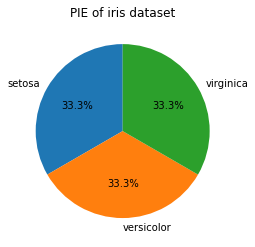

In [50]:
# ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）
label_counts = df["Species"].value_counts()
print(label_counts)
#円グラフするデータを渡す
#label_にdataを渡してdataにあるカラムを取得する
#autopctにパーセントを指定。以下の数字だと小数点一位まで表現する
#startangleに一番高いパーセントを90度の位置に表現することを指定
plt.title("PIE of iris dataset")
plt.pie(label_counts, labels=iris_dataset.target_names, startangle=90, autopct="%1.1f%%")
plt.show()

### 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

In [62]:
#特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='Species', ylabel='sepal_length'>

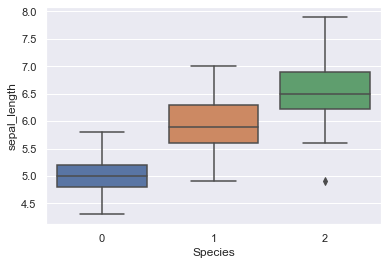

In [64]:
sns.boxplot(x="Species", y="sepal_length", data=df)#xにラベル、yに特徴量を入れる

### 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

<AxesSubplot:xlabel='Species', ylabel='sepal_width'>

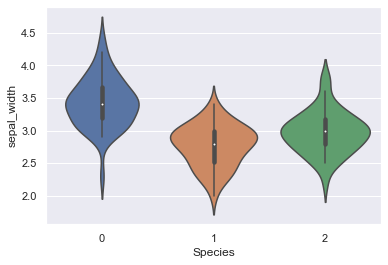

In [66]:
sns.violinplot(x="Species", y="sepal_width", data=df)#xにラベル、yに特徴量を入れる

## 【問題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。次の4つを行ってください。


４つの特徴量から２つ選ぶようなすべての組み合わせ（６つ）の散布図を種類ごとに色分けして作る。
以下の図はそのうち一つの例です。

すべての特徴量の組み合わせを一度に表示させた、散布図行列を作る。


seaborn.pairplot - seaborn 0.11.1 documentation


４つの特徴量に関する相関係数行列を作る

相関係数行列はDataFrameのcorr()メソッドを使うことで求められます。

pandas.DataFrame.corr — pandas 0.24.2 documentation


相関係数行列のヒートマップを作る(１つ)

seaborn.heatmap - seaborn 0.11.1 documentation

すべての特徴量の組み合わせを一度に表示させた、散布図行列を作る。

### ４つの特徴量に関する相関係数行列を作る

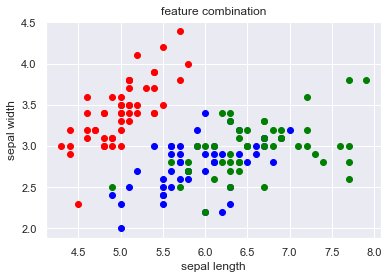

In [73]:
#４つの特徴量から２つ選ぶようなすべての組み合わせ（６つ）の散布図を種類ごとに色分けして作る。
#display(df.iloc[:,1].head()) 二次元配列のようにイメージして列番号指定
x_0 = df[df.Species==0].iloc[:,0] #sepal lengthでラベル0 
x_1 = df[df.Species==1].iloc[:,0] #sepal lengthでラベル1
x_2 = df[df.Species==2].iloc[:,0] #sepal lemgthでラベル2

y_0 = df[df.Species==0].iloc[:,1] #sepal widthでラベル0
y_1 = df[df.Species==1].iloc[:,1] #sepal widthでラベル1
y_2 = df[df.Species==2].iloc[:,1] #sepal widthでラベル2

#散布図を描画
plt.title("feature combination")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.scatter(x_0, y_0, c='red')
plt.scatter(x_1, y_1, c='blue')
plt.scatter(x_2, y_2, c='green')
plt.show()

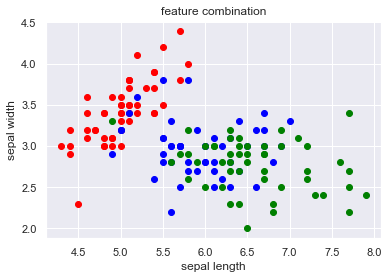

In [74]:
plt.title("feature combination")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.scatter(x_0, y_0, c='red')
plt.scatter(x_1, y_2, c='blue')
plt.scatter(x_2, y_1, c='green')
plt.show()

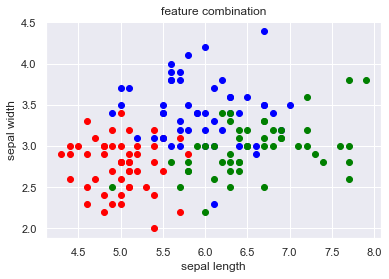

In [75]:
plt.title("feature combination")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.scatter(x_0, y_1, c='red')
plt.scatter(x_1, y_0, c='blue')
plt.scatter(x_2, y_2, c='green')
plt.show()

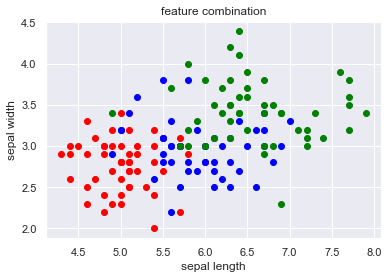

In [76]:
plt.title("feature combination")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.scatter(x_0, y_1, c='red')
plt.scatter(x_1, y_2, c='blue')
plt.scatter(x_2, y_0, c='green')
plt.show()

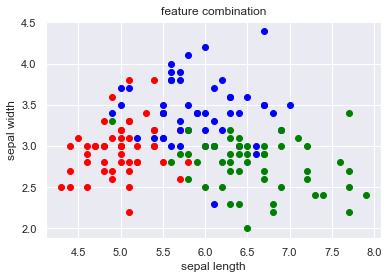

In [77]:
plt.title("feature combination")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.scatter(x_0, y_2, c='red')
plt.scatter(x_1, y_0, c='blue')
plt.scatter(x_2, y_1, c='green')
plt.show()

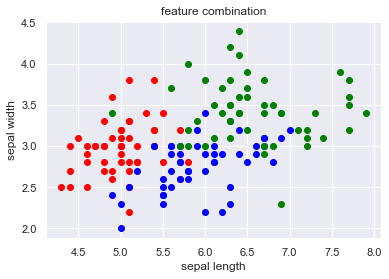

In [78]:
plt.title("feature combination")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.scatter(x_0, y_2, c='red')
plt.scatter(x_1, y_1, c='blue')
plt.scatter(x_2, y_0, c='green')
plt.show()

### すべての特徴量の組み合わせを一度に表示させた、散布図行列を作る。

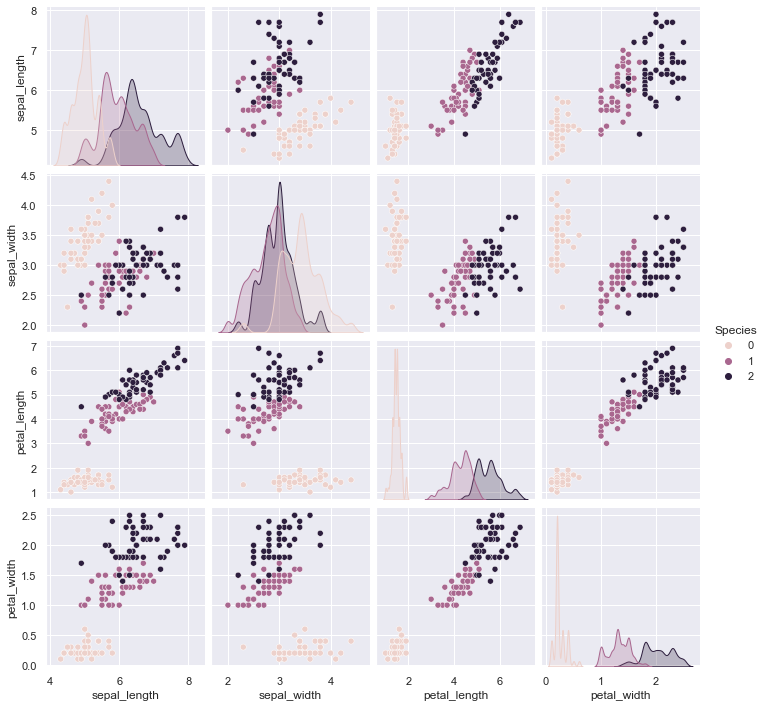

In [81]:
sns.pairplot(df, hue='Species', diag_kws={'bw_method': 0.2})

### ４つの特徴量に関する相関係数行列を作る

In [84]:
df.iloc[:,0:4].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### 相関係数行列のヒートマップを作る(１つ)

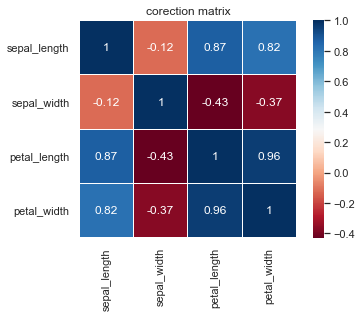

In [87]:
colormap = plt.cm.RdBu
plt.title("corection matrix")
sns.heatmap(df.iloc[:,0:4].corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor="white", annot=True)
plt.show()


## 【問題8】可視化したグラフや表の結果の説明
データを探索した時には、結果を述べる（+考察する）ことが大切です。ここまでで作成した表や図から読み取れることや気づきを説明してください。


例えば、散布図行列を見ながら、3種類のアヤメにはどのような違いがあるかを説明してください。

解答　

データに対して「仮説」を立てて、最終的に予測モデルを構築するのですが、そのプロセスにおいて「探索的データ解析」は重要な役割がある